In [1]:
# Importing the Keras libraries and packages

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
image_shape=(224,224,3)


2022-02-24 12:31:05.092587: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [ ]:
# convering Images into npy files

import os


def images_to_array(dataset_dir, image_size):
    dataset_array = []
    dataset_labels = []

    class_counter = 0

    classes_names = os.listdir(dataset_dir)
    for current_class_name in classes_names:
        class_dir = os.path.join(dataset_dir, current_class_name)
        images_in_class = os.listdir(class_dir)

        print("Class index", class_counter, ", ", current_class_name, ":" , len(images_in_class))

        for image_file in images_in_class:
            if image_file.endswith(".jpg"):
              image_file_dir = os.path.join(class_dir, image_file)

              img = tf.keras.preprocessing.image.load_img(image_file_dir, target_size=(image_size, image_size))
              img_array = tf.keras.preprocessing.image.img_to_array(img)

              img_array = img_array/255.0

              dataset_array.append(img_array)
              dataset_labels.append(class_counter)
        class_counter = class_counter + 1
    dataset_array = np.array(dataset_array)
    dataset_labels = np.array(dataset_labels)
    return dataset_array, dataset_labels

#zip_file = tf.keras.utils.get_file(origin="https://storage.googleapis.com/kaggle-datasets/5857/414958/fruits-360_dataset.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1566314394&Signature=rqm4aS%2FIxgWrNSJ84ccMfQGpjJzZ7gZ9WmsKok6quQMyKin14vJyHBMSjqXSHR%2B6isrN2POYfwXqAgibIkeAy%2FcB2OIrxTsBtCmKUQKuzqdGMnXiLUiSKw0XgKUfvYOTC%2F0gdWMv%2B2xMLMjZQ3CYwUHNnPoDRPm9GopyyA6kZO%2B0UpwB59uwhADNiDNdVgD3GPMVleo4hPdOBVHpaWl%2F%2B%2BPDkOmQdlcH6b%2F983JHaktssmnCu8f0LVeQjzZY96d24O4H85x8wdZtmkHZCoFiIgCCMU%2BKMMBAbTL66QiUUB%2FW%2FpULPlpzN9sBBUR2yydB3CUwqLmSjAcwz3wQ%2FpIhzg%3D%3D",
 #                                  fname="fruits-360.zip", extract=True)
base_dir = '/home/poornima/Data/GDPS'

train_dir = '/home/poornima/Data/GDPS/train_dir'
image_size = 224
train_dataset_array, train_dataset_array_labels = images_to_array(dataset_dir=train_dir, image_size=image_size)
print("Training Data Array Shape :", train_dataset_array.shape)
np.save("train_dataset_array.npy", train_dataset_array)
np.save("train_dataset_array_labels.npy", train_dataset_array_labels)

test_dir = '/home/poornima/Data/GDPS/val_dir'
test_dataset_array, test_dataset_array_labels = images_to_array(dataset_dir=test_dir, image_size=image_size)
print("Test Data Array Shape :", test_dataset_array.shape)
np.save("test_dataset_array.npy", test_dataset_array)
np.save("test_dataset_array_labels.npy", test_dataset_array_labels)

In [ ]:
classes = ["genuine","forged"]

In [ ]:
X_train= np.load('train_dataset_array.npy')
y_train= np.load('train_dataset_array_labels.npy')
X_test=  np.load('test_dataset_array.npy')
y_test=  np.load('test_dataset_array_labels.npy')

In [ ]:
X_train =X_train / 255
X_test = X_test / 255

In [2]:
from tensorflow.keras.models import Sequential
model=Sequential()

2022-02-24 12:31:13.546009: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-24 12:31:13.548083: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-02-24 12:31:13.627347: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:18:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.45GiB deviceMemoryBandwidth: 625.94GiB/s
2022-02-24 12:31:13.627428: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-02-24 12:31:13.649397: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-02-24 12:31:13.649523: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-0

In [3]:
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096, activation= 'relu'))
model.add(Dense(4096, activation= 'relu'))
model.add(Dense(1000, activation= 'relu'))
hidden_layer=model.add(Dense(128, activation='relu', name='hidden_layer'))
classification_layer=model.add(Dense(64, activation='relu', name='classification_layer'))
output_layer=model.add(Dense(1, activation='sigmoid', name='output_layer')) 
print("All layers top of pretrained layers are developed")

All layers top of pretrained layers are developed


https://www.kaggle.com/blurredmachine/alexnet-architecture-a-complete-guide

In [5]:
# Input parameter
#train_data_dir ='/content/drive/My Drive/Colab Notebooks/Dataset GDPS/train_dir'
train_data_dir='/home/poornima/Data/GDPS/train_dir/'
val_data_dir ='/home/poornima/Data/GDPS/val_dir/'
model_weights_file = '/home/poornima/Data/GDPS/Signature_Verification_GDPS_SGD_Novel-FINAL.hdf5'
nb_epochs = 300
print("Input parameters are assigned")

Input parameters are assigned


In [6]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
print("Model is Complied")

Model is Complied


In [7]:
# image data generation

from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_width, img_height = 224, 224
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), 
                                                    batch_size=16,shuffle=False, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(val_data_dir, target_size=(img_width, img_height), 
                                                    batch_size=16,shuffle=False,class_mode='binary')

Found 172800 images belonging to 2 classes.
Found 43200 images belonging to 2 classes.


In [ ]:
model.fit(X_train, y_train, epochs=50)
print("training completed")

In [9]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
filepath = '/home/poornima/Data/GDPS/Signature_Verification_GDPS_SGD_Novel-FINAL-{epoch:02d}-{val_accuracy:.2f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=100, verbose=1, mode='auto')

In [10]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


2022-02-24 12:50:17.944324: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:18:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.45GiB deviceMemoryBandwidth: 625.94GiB/s
2022-02-24 12:50:17.944410: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-02-24 12:50:17.944461: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-02-24 12:50:17.944482: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-02-24 12:50:17.944504: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcufft.so.10
2022-02-24 12:50:17.944524: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcurand.so

In [11]:
#callbacks = [ModelCheckpoint(model_weights_file, monitor='val_acc', save_best_only=True)]

history = model.fit(train_generator, epochs=300, validation_data=validation_generator, callbacks=[checkpoint,early])

print('Training Completed!')

2022-02-24 12:50:42.815804: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-24 12:50:42.818289: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200000000 Hz


Epoch 1/300


2022-02-24 12:50:43.586050: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-02-24 12:50:43.884757: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-02-24 12:50:45.167902: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-02-24 12:50:45.264674: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


10800/10800 [==============================] - 2117s 193ms/step - loss: 0.6879 - accuracy: 0.5503 - val_loss: 0.6875 - val_accuracy: 0.5556

Epoch 00001: val_accuracy improved from -inf to 0.55556, saving model to /home/poornima/Data/GDPS/Signature_Verification_GDPS_SGD_Novel-FINAL-01-0.56.h5
Epoch 2/300
10800/10800 [==============================] - 2071s 192ms/step - loss: 0.6886 - accuracy: 0.5515 - val_loss: 0.6882 - val_accuracy: 0.5556

Epoch 00002: val_accuracy did not improve from 0.55556
Epoch 3/300
10800/10800 [==============================] - 2070s 192ms/step - loss: 0.6883 - accuracy: 0.5457 - val_loss: 0.6869 - val_accuracy: 0.5556

Epoch 00003: val_accuracy did not improve from 0.55556
Epoch 4/300
10800/10800 [==============================] - 2061s 191ms/step - loss: 0.6869 - accuracy: 0.5589 - val_loss: 0.6871 - val_accuracy: 0.5556

Epoch 00004: val_accuracy did not improve from 0.55556
Epoch 5/300
10800/10800 [==============================] - 2073s 192ms/step - loss

10800/10800 [==============================] - 2069s 192ms/step - loss: 0.6894 - accuracy: 0.5480 - val_loss: 0.6873 - val_accuracy: 0.5556

Epoch 00040: val_accuracy did not improve from 0.55556
Epoch 41/300
10800/10800 [==============================] - 2066s 191ms/step - loss: 0.6900 - accuracy: 0.5428 - val_loss: 0.6856 - val_accuracy: 0.5556

Epoch 00041: val_accuracy did not improve from 0.55556
Epoch 42/300
10800/10800 [==============================] - 2075s 192ms/step - loss: 0.6864 - accuracy: 0.5513 - val_loss: 0.6771 - val_accuracy: 0.5620

Epoch 00042: val_accuracy improved from 0.55556 to 0.56204, saving model to /home/poornima/Data/GDPS/Signature_Verification_GDPS_SGD_Novel-FINAL-42-0.56.h5
Epoch 43/300
10800/10800 [==============================] - 2065s 191ms/step - loss: 0.6731 - accuracy: 0.5759 - val_loss: 0.6544 - val_accuracy: 0.6001

Epoch 00043: val_accuracy improved from 0.56204 to 0.60007, saving model to /home/poornima/Data/GDPS/Signature_Verification_GDPS_SG

10800/10800 [==============================] - 2066s 191ms/step - loss: 0.3563 - accuracy: 0.8417 - val_loss: 0.8203 - val_accuracy: 0.6342

Epoch 00075: val_accuracy did not improve from 0.65701
Epoch 76/300
10800/10800 [==============================] - 2071s 192ms/step - loss: 0.3296 - accuracy: 0.8537 - val_loss: 0.8941 - val_accuracy: 0.6342

Epoch 00076: val_accuracy did not improve from 0.65701
Epoch 77/300
10800/10800 [==============================] - 2063s 191ms/step - loss: 0.3069 - accuracy: 0.8667 - val_loss: 0.9057 - val_accuracy: 0.6349

Epoch 00077: val_accuracy did not improve from 0.65701
Epoch 78/300
10800/10800 [==============================] - 2063s 191ms/step - loss: 0.2873 - accuracy: 0.8776 - val_loss: 0.9705 - val_accuracy: 0.6272

Epoch 00078: val_accuracy did not improve from 0.65701
Epoch 79/300
10800/10800 [==============================] - 2063s 191ms/step - loss: 0.2642 - accuracy: 0.8882 - val_loss: 1.0842 - val_accuracy: 0.6206

Epoch 00079: val_accura

10800/10800 [==============================] - 2064s 191ms/step - loss: 0.0733 - accuracy: 0.9615 - val_loss: 1.7807 - val_accuracy: 0.6200

Epoch 00153: val_accuracy did not improve from 0.65701
Epoch 154/300
10800/10800 [==============================] - 2062s 191ms/step - loss: 0.0298 - accuracy: 0.9899 - val_loss: 2.2721 - val_accuracy: 0.6223

Epoch 00154: val_accuracy did not improve from 0.65701
Epoch 155/300
10800/10800 [==============================] - 2058s 191ms/step - loss: 0.0205 - accuracy: 0.9929 - val_loss: 2.3234 - val_accuracy: 0.6269

Epoch 00155: val_accuracy did not improve from 0.65701
Epoch 156/300
10800/10800 [==============================] - 2073s 192ms/step - loss: 0.0163 - accuracy: 0.9946 - val_loss: 2.5996 - val_accuracy: 0.6225

Epoch 00156: val_accuracy did not improve from 0.65701
Epoch 157/300
10800/10800 [==============================] - 2064s 191ms/step - loss: 0.0168 - accuracy: 0.9946 - val_loss: 2.1126 - val_accuracy: 0.6274

Epoch 00157: val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


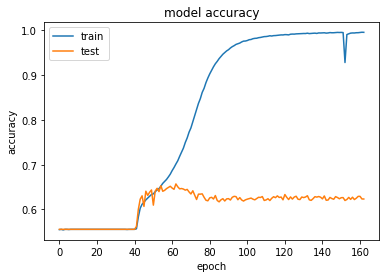

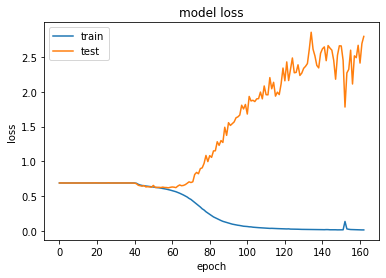

In [12]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')



plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
 # save model and architecture to single file
model.save('/home/poornima/Data/GDPS/Signature_Verification_GDPS_SGD_Novel-FINAL.h5')
model.summary()

print("Saved model to disk")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [14]:
# save weights to single file
model.save_weights('/home/poornima/Data/GDPS/Signature_Verification_WEIGHTS_GDPS_SGD_Novel-FINAL.h5')
print("Weights saved in local  Drive")

Weights saved in local  Drive


In [71]:
# Loading saved model from Drive.
from tensorflow.keras.models import load_model
model = load_model('/home/poornima/Data/GDPS/Signature_Verification_GDPS_SGD_Novel-FINAL.h5')
print("Model is Loaded")
model.summary()

Model is Loaded
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 

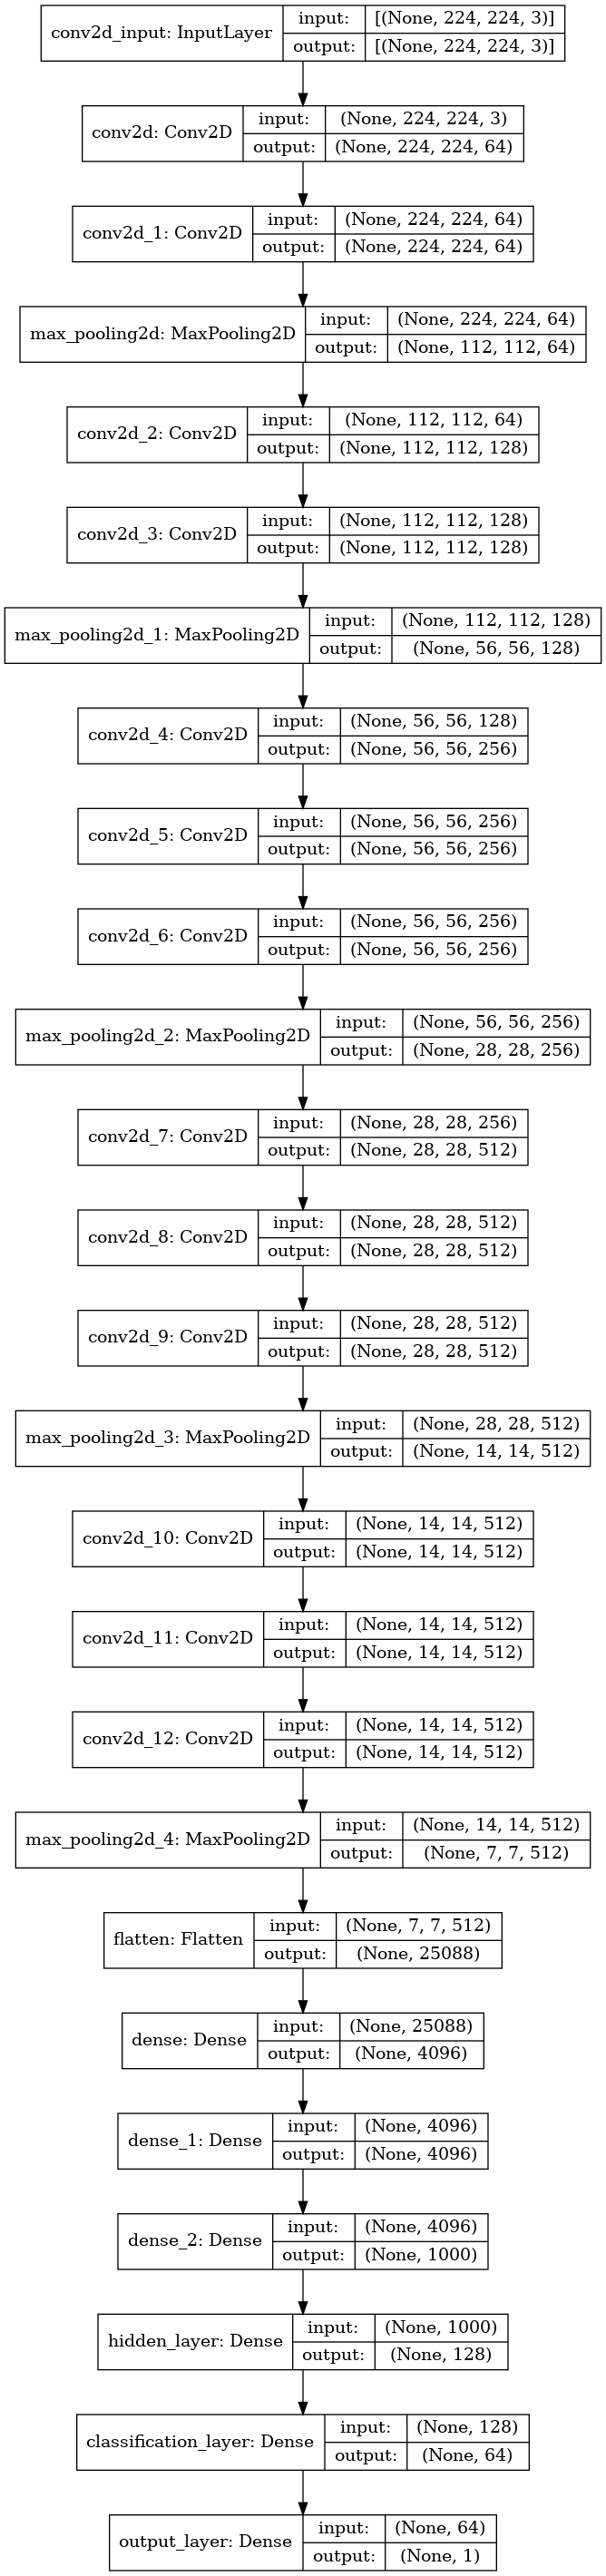

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot_CNN.png', show_shapes=True, show_layer_names=True)

In [72]:
import pandas as pd
validation_generator.reset
ytesthat = model.predict(validation_generator)
print(ytesthat)
df = pd.DataFrame({
    'filename':validation_generator.filenames,
    'predict':ytesthat[:,0],
    'y':validation_generator.classes
})

[[3.3538299e-07]
 [2.3144310e-04]
 [3.5800848e-03]
 ...
 [7.2626844e-12]
 [8.1919950e-07]
 [9.5099526e-14]]


In [74]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df

,filename,predict,y,y_pred
0,forged/cf-001-01.jpg,0.00000,0,0
1,forged/cf-001-02.jpg,0.00023,0,0
2,forged/cf-001-03.jpg,0.00358,0,0
3,forged/cf-001-04.jpg,0.00000,0,0
4,forged/cf-001-05.jpg,0.00000,0,0
...,...,...,...,...
43195,genuine/c-1636-20.jpg,0.00000,1,0
43196,genuine/c-1636-21.jpg,0.00000,1,0
43197,genuine/c-1636-22.jpg,0.00000,1,0
43198,genuine/c-1636-23.jpg,0.00000,1,0


In [75]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified  Validation images : %d'%misclassified['y'].count())

Total misclassified  Validation images : 16272


Text(33.0, 0.5, 'true value')

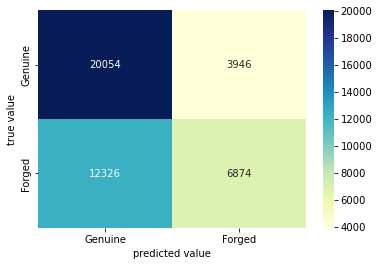

In [76]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g', xticklabels=['Genuine', 'Forged'], yticklabels=['Genuine', 'Forged'] );
plt.xlabel('predicted value')
plt.ylabel('true value')

/home/poornima/anaconda3/envs/keras/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


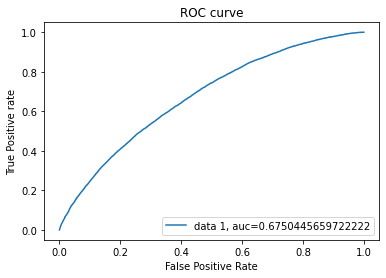

In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = model.predict_proba(validation_generator)[:,0]
fpr, tpr, _ = roc_curve(df.y,  y_pred_proba)
auc = roc_auc_score(df.y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc=4)
plt.show()

In [78]:
from sklearn.metrics import recall_score
tpr = recall_score(df.y,df.y_pred)   # it is better to name it y_test 
# to calculate, tnr we need to set the positive label to the other class
# I assume your negative class consists of 0, if it is -1, change 0 below to that value
tnr = recall_score(df.y,df.y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr

In [79]:
print(fpr)

0.16441666666666666


In [80]:
print(fnr)

0.6419791666666667


In [81]:
import pandas as pd
train_generator.reset
ytesthat = model.predict(train_generator)
print(ytesthat)
df = pd.DataFrame({
    'filename':train_generator.filenames,
    'predict':ytesthat[:,0],
    'y_train':train_generator.classes
})

[[1.6936773e-01]
 [3.0567867e-01]
 [4.9730964e-10]
 ...
 [9.9998975e-01]
 [9.9960810e-01]
 [9.9992156e-01]]


In [82]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_train_pred'] = df['predict']>0.5
df.y_train_pred = df.y_train_pred.astype(int)
df

,filename,predict,y_train,y_train_pred
0,forged/cf-1637-01.jpg,0.16937,0,0
1,forged/cf-1637-02.jpg,0.30568,0,0
2,forged/cf-1637-03.jpg,0.00000,0,0
3,forged/cf-1637-04.jpg,0.00001,0,0
4,forged/cf-1637-05.jpg,0.00007,0,0
...,...,...,...,...
172795,genuine/c-999-20.jpg,0.99994,1,1
172796,genuine/c-999-21.jpg,0.99999,1,1
172797,genuine/c-999-22.jpg,0.99999,1,1
172798,genuine/c-999-23.jpg,0.99961,1,1


In [83]:
misclassified = df[df['y_train']!=df['y_train_pred']]
print('Total misclassified  Validation images : %d'%misclassified['y_train'].count())

Total misclassified  Validation images : 691


Text(33.0, 0.5, 'true value')

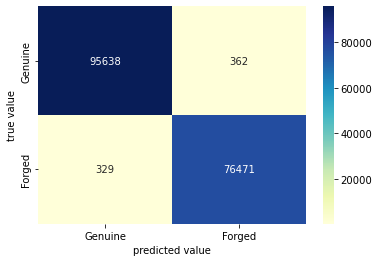

In [84]:
#Prediction of Training set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y_train,df.y_train_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g', xticklabels=['Genuine', 'Forged'], yticklabels=['Genuine', 'Forged'] );
plt.xlabel('predicted value')
plt.ylabel('true value')

/home/poornima/anaconda3/envs/keras/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


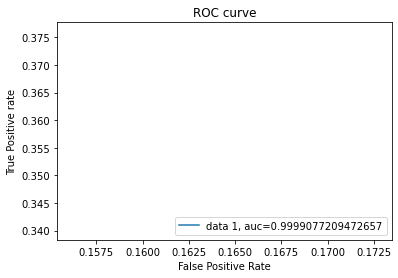

In [85]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_train_pred_proba = model.predict_proba(train_generator)[:,0]
fpr_train, tpr_train, _ = roc_curve(df.y_train,  y_train_pred_proba)
auc = roc_auc_score(df.y_train,  y_train_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc=4)
plt.show()

In [86]:
plt.savefig("training_ROC_curve.png")

<Figure size 432x288 with 0 Axes>

In [88]:
from sklearn.metrics import recall_score
tpr = recall_score(df.y_train,df.y_train_pred)   # it is better to name it y_test 
# to calculate, tnr we need to set the positive label to the other class
# I assume your negative class consists of 0, if it is -1, change 0 below to that value
tnr = recall_score(df.y_train,df.y_train_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr


In [90]:
print("Flase positive Rate    "+  str(fpr))
print("Flase Negative Rate      "+  str(fnr))

Flase positive Rate    0.003770833333333279
Flase Negative Rate      0.004283854166666656


In [49]:
# Extracting Features from classification Layer
from tensorflow.keras.models import Model
layer_name= 'classification_layer'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
print("Imtermediate model is constructed")


Imtermediate model is constructed


In [50]:
# Compilation of intermediate model
intermediate_layer_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
print("Model is Complied")

Model is Complied


In [51]:
# Saving intermediate model
intermediate_layer_model.save('/home/poornima/Data/GDPS/Signature_Verification_GDPS_SGD_NoveL_intermediate_model.h5')
intermediate_layer_model.summary()

print("Saved Intermediate model to disk")

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0   

In [52]:
# Loading Intermediate Model
from tensorflow.keras.models import load_model

model = load_model('/home/poornima/Data/GDPS/Signature_Verification_GDPS_SGD_NoveL_intermediate_model.h5')
print("Intermediate model is loaded")

Intermediate model is loaded


In [34]:
# Training Label feature identification(y_train)

batch_size=16
sample_count=172800
features = np.zeros(shape=(172800, 64))  # Must be equal to the output of the convolutional base
labels = np.zeros(shape=(172800))
i = 0
for inputs_batch, labels_batch in train_generator:
   features_batch = model.predict(inputs_batch)
   features[i * batch_size: (i + 1) * batch_size] = features_batch
   labels[i * batch_size: (i + 1) * batch_size] = labels_batch
   i += 1
   if i*batch_size  >= sample_count:
     break
print(labels.shape)

(172800,)


In [35]:
#identification of training Labels
features_train=features
print(features_train.shape)
labels_train=np.expand_dims(labels, axis=1)
print(labels_train.shape)
print(labels_train)
print(features_train)

(172800, 64)
(172800, 1)
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
[[0.         0.         0.         ... 2.52907419 0.         0.58444768]
 [0.         0.         0.         ... 1.86369669 0.         0.        ]
 [0.         0.         0.         ... 1.68260705 0.         0.62407386]
 ...
 [0.         3.82223845 2.57166934 ... 0.         0.31463978 0.        ]
 [0.         4.17052794 3.41389322 ... 1.31855047 1.11241508 0.        ]
 [0.         3.56231761 3.30371904 ... 1.88273275 0.92336369 0.        ]]


In [53]:
# identification of test labels
import numpy as np
batch_size=16
sample_count=43200
features_test = np.zeros(shape=(43200, 64))  # Must be equal to the output of the convolutional base
labels_test = np.zeros(shape=(43200))
i = 0
for inputs_batch, labels_batch in validation_generator:
   features_batch = model.predict(inputs_batch)
   features_test[i * batch_size: (i + 1) * batch_size] = features_batch
   labels_test[i * batch_size: (i + 1) * batch_size] = labels_batch
   i += 1
   if i*batch_size  >= sample_count:
     break
print(labels_test.shape)
print(features_test.shape)
print(labels_test)

(43200,)
(43200, 64)
[0. 0. 0. ... 1. 1. 1.]


In [54]:
# #identification of testing Labels
print(features_test.shape)
labels_test=np.expand_dims(labels_test, axis=1)
print(labels_test.shape)
print(features_test)

(43200, 64)
(43200, 1)
[[0.         0.         0.         ... 0.11072733 0.         0.        ]
 [0.         0.         0.1694645  ... 0.         0.13712069 0.        ]
 [0.         0.         0.04023382 ... 0.         0.1546997  0.        ]
 ...
 [0.         0.         0.         ... 0.09333585 0.         0.02432055]
 [0.         0.         0.         ... 0.         0.         0.09069319]
 [0.         0.         0.00435484 ... 0.         0.         0.17354922]]


In [55]:
# SVM
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train,labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[17351  6649]
 [ 8336 10864]]
Accuracy: 65.312
Precision: 62.034
Recall: 56.583
F-Measure: 59.183


In [56]:
# Kernel SVM
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[19144  4856]
 [10248  8952]]
Accuracy: 65.037
Precision: 64.832
Recall: 46.625
F-Measure: 54.241


In [57]:
# Random Forest
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[15981  8019]
 [ 7052 12148]]
Accuracy: 65.113
Precision: 60.237
Recall: 63.271
F-Measure: 61.717


In [58]:
# Naive Bayes
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[16380  7620]
 [ 7385 11815]]
Accuracy: 65.266
Precision: 60.792
Recall: 61.536
F-Measure: 61.162


In [59]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier =  KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[16130  7870]
 [ 9002 10198]]
Accuracy: 60.944
Precision: 56.442
Recall: 53.115
F-Measure: 54.728


In [60]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[14964  9036]
 [ 6117 13083]]
Accuracy: 64.924
Precision: 59.148
Recall: 68.141
F-Measure: 63.327


/home/poornima/anaconda3/envs/keras/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
from tensorflow.keras.models import load_model

model = load_model('/home/poornima/Data/GDPS/Signature_Verification_GDPS_SGD_Novel-FINAL-63-0.66.h5')
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(validation_generator)
print('test loss, test acc:', results)


# Evaluate on test data
2700/2700 [==============================] - 125s 46ms/step - loss: 0.6209 - accuracy: 0.6570
test loss, test acc: [0.6208863854408264, 0.6570138931274414]


In [47]:
'/home/poornima/Data/GDPS/Signature_Verification_GDPS_SGD_Novel-FINAL.h5'
from tensorflow.keras.models import load_model

model = load_model('/home/poornima/Data/GDPS/Signature_Verification_GDPS_SGD_Novel-FINAL.h5')
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(validation_generator)
print('test loss, test acc:', results)


# Evaluate on test data
2700/2700 [==============================] - 126s 47ms/step - loss: 2.7977 - accuracy: 0.6233
test loss, test acc: [2.7976648807525635, 0.6233333349227905]


In [61]:

# decision tree
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)

classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[15614  8386]
 [ 8296 10904]]
Accuracy: 61.384
Precision: 56.527
Recall: 56.792
F-Measure: 56.659


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.models import load_model
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Click to know category of Image",  )
output = widgets.Output()

model = load_model('/home/poornima/Data/GDPS/Signature_Verification_GDPS_SGD_Novel-FINAL.h5')
img_path = '/home/poornima/Data/GDPS/train_dir/forged/cf-001-01.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)
print(block4_pool_features)
if(block4_pool_features> 0.5):
  a= 'Genuine'
elif(block4_pool_features< 0.5):
  a='forged'
def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    print("Image is  "  + a)

button.on_click(on_button_clicked)
display(button, output)